In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rkiattisak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer


100%|██████████| 3.20k/3.20k [00:00<00:00, 2.03MB/s]

In [ ]:
import os
os.listdir("/content/salary-prediction-for-beginer")

['Salary Data.csv']

In [ ]:
df=pd.read_csv("/content/salary-prediction-for-beginer/Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
#label Encoder assigns values: Male=1 and Female=0, Bachelor's =0 & Master's=1 and PhD=2

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_columns=['Gender','Education Level', 'Job Title']
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [ ]:
#Defined X & Y

X=df.drop('Salary',axis=1)
y=df['Salary']

In [ ]:
#Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train models

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df.isnull().sum()

,0
Age,2
Gender,0
Education Level,0
Job Title,0
Years of Experience,2
Salary,2


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Salary',axis=1)
y=df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model

rf=RandomForestRegressor(n_estimators=100, random_state=42)
gb=GradientBoostingRegressor(n_estimators=100, random_state=42)

#Train
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

#Predict
rf_pred=rf.predict(X_test)
gb_pred=gb.predict(X_test)

#Scores
print("Random Forest R2 score: ", r2_score(y_test, rf_pred))
print("Gradient Boosting R2 score: ", r2_score(y_test, gb_pred))

Random Forest R2 score:  0.9271754685609073
Gradient Boosting R2 score:  0.9223950650081131


In [ ]:
#Voting Regressor(Ensemble)

vr=VotingRegressor([('rf', rf), ('gb', gb)])
vr.fit(X_train, y_train)
vr_pred=vr.predict(X_test)
print("Voting Regressor R2 score: ", r2_score(y_test, vr_pred))

Voting Regressor R2 score:  0.9273467032939008


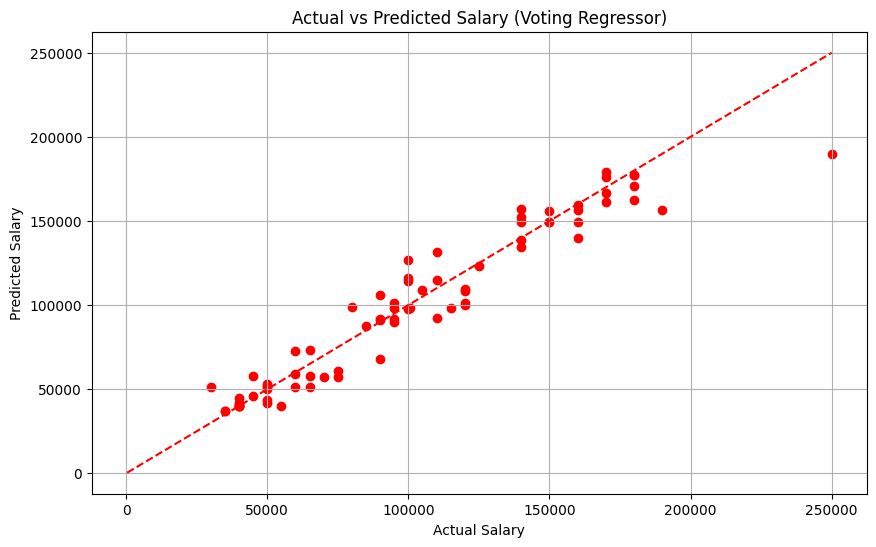

In [ ]:
#Visualization (Actual vs Predicted)

plt.figure(figsize=(10,6))
plt.scatter(y_test, vr_pred, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Voting Regressor)")
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(vr, 'salary_prediction_model.pkl')
print("Model saved as salary_prediction_model.pkl")

Model saved as salary_prediction_model.pkl


In [ ]:
df=pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
#example :1
new_data=np.array([[26, 3, 1, 4, 90]])
rf_pred = rf.predict(new_data)
gb_pred = gb.predict(new_data)
vr_pred = vr.predict(new_data)
final_pred = (rf_pred + gb_pred + vr_pred) / 3
print("Predicted Salary:", final_pred[0])

Predicted Salary: 101870.91822920856


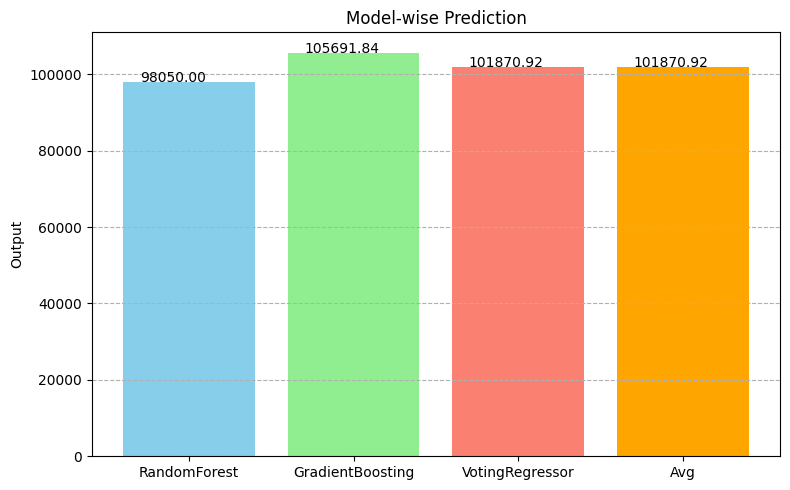

In [ ]:
def predict_and_plot(input_data):
    rf_pred = rf.predict(input_data)
    gb_pred = gb.predict(input_data)
    vr_pred = vr.predict(input_data)
    final_pred = (rf_pred + gb_pred + vr_pred) / 3

    # Plot
models = ['RandomForest', 'GradientBoosting', 'VotingRegressor', 'Avg']
preds = [rf_pred[0], gb_pred[0], vr_pred[0], final_pred[0]]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, preds, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + 0.1, yval + 0.5, f'{yval:.2f}', fontsize=10)

plt.title("Model-wise Prediction")
plt.ylabel("Output")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
#Example:2

new_data=np.array([[100, 10, 80, 90, 80]])
rf_pred = rf.predict(new_data)
gb_pred = gb.predict(new_data)
vr_pred = vr.predict(new_data)
final_pred = (rf_pred + gb_pred + vr_pred) / 3
print("Predicted Salary:", final_pred[0])

Predicted Salary: 182201.3905342675


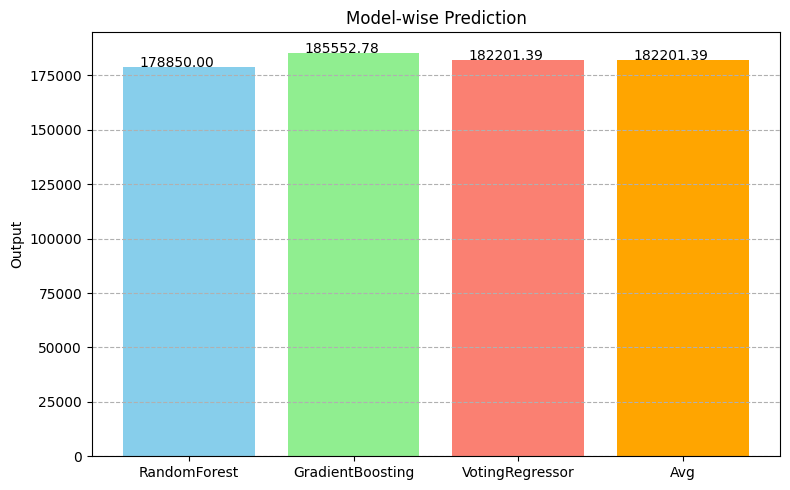

In [ ]:
models = ['RandomForest', 'GradientBoosting', 'VotingRegressor', 'Avg']
preds = [rf_pred[0], gb_pred[0], vr_pred[0], final_pred[0]]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, preds, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + 0.1, yval + 0.5, f'{yval:.2f}', fontsize=10)

plt.title("Model-wise Prediction")
plt.ylabel("Output")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download('salary_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>